In [305]:
# -*- coding: utf-8 -*- 
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 
import sklearn.metrics as mt 
from sklearn.tree import export_graphviz 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV 
import joblib 
from sklearn.metrics import confusion_matrix 


In [319]:
# 1. 모델 로드
np.set_printoptions(precision=4, suppress = True)

rnd_clf = joblib.load("auto_model.pkl") 
print("\n< AI model: load >") 


< AI model: load >


In [317]:
 # 1. daily raw data 가져오기
model_data = pd.read_excel(r"C:\Users\siim2\sic_project_final\data\auto_raw_20_60_1.xlsx", sheet_name="Sheet1", header=0, index_col=0)

In [318]:
model_data.tail()

,forward_stage,원/달러 환율,원/엔 환율,국채 3년물,국채 10년물,PER,PBR,VKOSPI,treasury_10_3_diff,T10Y2Y,...,us_e_infla_60,yield_gap(%)_60,cpi_60,export_60,WTI_60,DGS2_60,DGS10_60,TIPS_60,VIX_60,PPI_60
base_date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,up,1315.4,906.14,3.284,3.400,18.88,0.93,17.80,0.063,-0.34,...,-0.002093,0.005319,-0.002759,0.002280,-0.003839,-0.003212,-0.004320,-0.006726,-0.008504,-0.000572
2024-01-08,up,1316.0,912.78,3.298,3.435,18.81,0.93,17.77,0.044,-0.35,...,-0.002125,0.005384,-0.002890,0.002679,-0.003878,-0.003247,-0.004334,-0.006732,-0.008484,-0.000560
2024-01-09,up,1315.7,914.16,3.256,3.348,18.76,0.93,17.42,0.068,-0.35,...,-0.002148,0.005521,-0.003015,0.003076,-0.003814,-0.003316,-0.004379,-0.006809,-0.008529,-0.000546
2024-01-10,up,1320.1,911.39,3.269,3.346,18.62,0.92,16.79,0.077,-0.33,...,-0.002169,0.005581,-0.003132,0.003469,-0.003806,-0.003364,-0.004437,-0.006916,-0.008666,-0.000552
2024-01-11,up,1312.9,902.68,3.227,3.339,18.60,0.92,17.14,0.076,-0.28,...,-0.002172,0.005630,-0.003241,0.003858,-0.003793,-0.003421,-0.004468,-0.006987,-0.008758,-0.000558


In [309]:
model_data.info

<bound method DataFrame.info of            forward_stage  원/달러 환율   원/엔 환율  국채 3년물   국채 10년물     PER   PBR  \
base_date                                                                    
2010-03-31            up   1131.3  1213.45    3.895     4.940  24.35  1.36   
2010-04-01            up   1126.4  1204.45    3.895     4.920  24.13  1.38   
2010-04-05            up   1123.1  1188.97    3.840     4.950  24.22  1.38   
2010-04-06            up   1123.2  1195.40    3.845     4.940  24.24  1.38   
2010-04-07            up   1120.5  1191.13    3.820     4.880  24.26  1.39   
...                  ...      ...      ...      ...       ...    ...   ...   
2024-01-05            up   1315.4   906.14    3.284     3.400  18.88  0.93   
2024-01-08            up   1316.0   912.78    3.298     3.435  18.81  0.93   
2024-01-09            up   1315.7   914.16    3.256     3.348  18.76  0.93   
2024-01-10            up   1320.1   911.39    3.269     3.346  18.62  0.92   
2024-01-11            up   1312.

In [310]:
model_data_dropna = model_data.dropna()

if model_data_dropna.empty:
    print("error")
else:
    # 종속 변수(y) 및 독립 변수(X) 설정
    first_column_name = model_data.columns[0]
    y = model_data_dropna[first_column_name]
    X = model_data_dropna.drop(columns=[first_column_name])
print(X)

            원/달러 환율   원/엔 환율  국채 3년물   국채 10년물     PER   PBR  VKOSPI  \
base_date                                                              
2010-03-31   1131.3  1213.45    3.895     4.940  24.35  1.36   13.47   
2010-04-01   1126.4  1204.45    3.895     4.920  24.13  1.38   13.63   
2010-04-05   1123.1  1188.97    3.840     4.950  24.22  1.38   13.56   
2010-04-06   1123.2  1195.40    3.845     4.940  24.24  1.38   14.75   
2010-04-07   1120.5  1191.13    3.820     4.880  24.26  1.39   14.22   
...             ...      ...      ...       ...    ...   ...     ...   
2024-01-05   1315.4   906.14    3.284     3.400  18.88  0.93   17.80   
2024-01-08   1316.0   912.78    3.298     3.435  18.81  0.93   17.77   
2024-01-09   1315.7   914.16    3.256     3.348  18.76  0.93   17.42   
2024-01-10   1320.1   911.39    3.269     3.346  18.62  0.92   16.79   
2024-01-11   1312.9   902.68    3.227     3.339  18.60  0.92   17.14   

            treasury_10_3_diff  T10Y2Y  usa_cpi  ...  us_e_infl

In [311]:
print("\n<Current status>")

for col, score in zip(X.columns, X.iloc[-1]):
    print("{:18} : {:>8.3f}".format(col, score))
X_current = np.array(X.iloc[-1]).reshape(1,-1)


<Current status>
원/달러 환율            : 1312.900
원/엔 환율             :  902.680
국채 3년물             :    3.227
국채 10년물            :    3.339
PER                :   18.600
PBR                :    0.920
VKOSPI             :   17.140
treasury_10_3_diff :    0.076
T10Y2Y             :   -0.280
usa_cpi            :    0.034
us_e_infla         :    2.220
yield_gap(%)       :    0.021
cpi                :    0.032
export             :   -0.072
WTI                :   72.150
DGS2               :    4.260
DGS10              :    3.980
TIPS               :    1.760
VIX                :   12.440
PPI                :  242.917
원/달러 환율_20         :    0.000
원/엔 환율_20          :    0.000
국채 3년물 _20         :   -0.002
국채 10년물 _20        :    0.002
PER_20             :   -0.001
PBR_20             :    0.000
VKOSPI_20          :    0.015
treasury_10_3_diff_20 :   -0.000
T10Y2Y_20          :    0.024
usa_cpi_20         :    0.001
us_e_infla_20      :    0.001
yield_gap(%)_20    :    0.007
cpi_20             

In [312]:
# 5. 현재 전망
print("\n< AI model: forecasting >") 
y_current_pred = rnd_clf.predict(X_current) 
print("forecast: ", y_current_pred) 


< AI model: forecasting >
forecast:  ['down']


In [313]:
# 주어진 데이터를 사용하여 각 클래스의 확률을 예측
prob_current = rnd_clf.predict_proba(X_current) 
y_names = rnd_clf.classes_

print("\n[class] : [prob]") 
max_prob = max(prob_current[0]) # 최대 확률 초기화
for name, prob in zip(y_names, prob_current[0]):
    print("{:7} : {:.2f}".format(name, prob))

# 최대 확률에 해당하는 클래스의 이름과 확률을 출력
max_prob_index = prob_current[0].argmax() # 최대 확률의 인덱스를 찾음
max_prob_class = y_names[max_prob_index] # 최대 확률에 해당하는 클래스의 이름
print("앞으로 %s 할 확률이 %f" % (max_prob_class, max_prob))



[class] : [prob]
down    : 0.39
neutral : 0.23
up      : 0.38
앞으로 down 할 확률이 0.387097


In [314]:
# 전기간 전망치 확률 데이터생성
prob = rnd_clf.predict_proba(X) 
prob_df = pd.DataFrame(prob, index=y.index, columns=y_names) 

C:\Users\siim2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


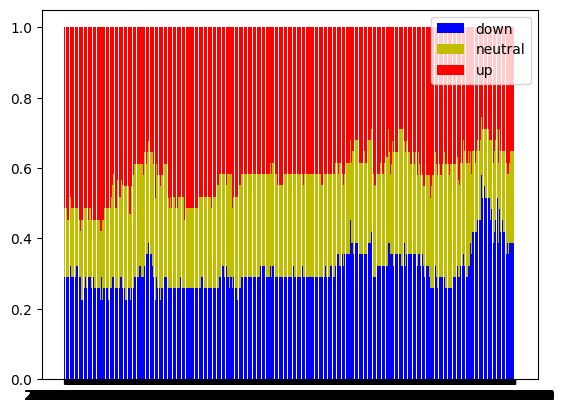

In [315]:
# 전망치 확률의 그래프 출력
prob_data = prob_df 
# 중립 값을 neutral로 설정


plt.bar(prob_data.index, prob_data['down'], label='down', color='b', bottom=0)
plt.bar(prob_data.index, prob_data['neutral'], label='neutral', color='y', bottom=prob_data['down'])
plt.bar(prob_data.index, prob_data['up'], label='up', color='r', bottom=prob_data['down'] + prob_data['neutral'])


# 범례 추가
plt.legend()

# 그래프 출력
plt.show()